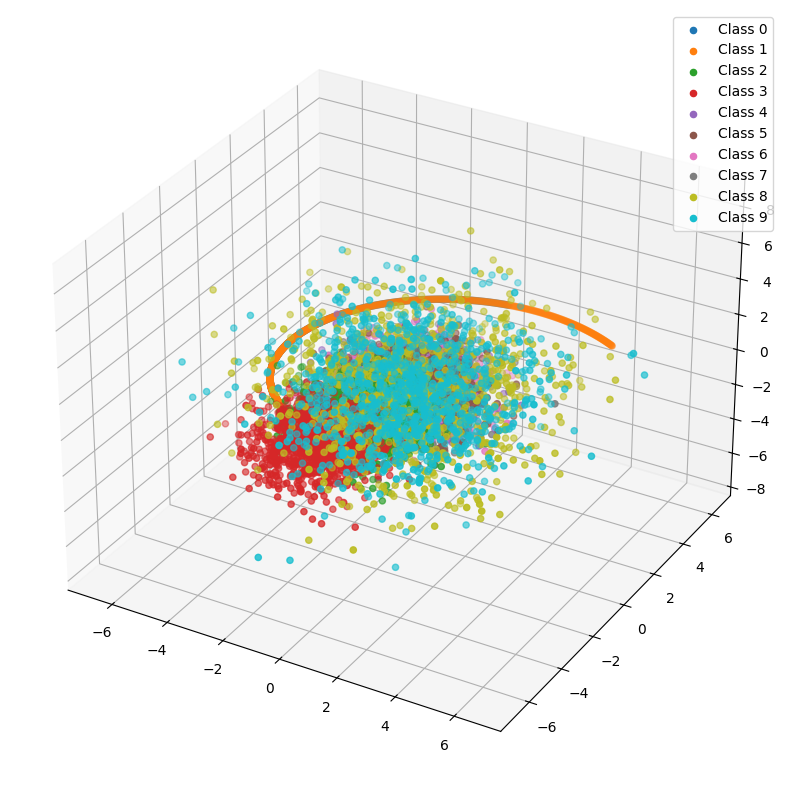

313/313 [==============================] - 0s 660us/step
Classification results saved to: C:\Users\Daniel\Desktop\screen\300Epok\3drepclassification_results_0_adam_L2_N8.png
Training results saved to: C:\Users\Daniel\Desktop\screen\300Epok\3dreptraining_results_0_adam_L2_N8.png
313/313 [==============================] - 0s 659us/step
Classification results saved to: C:\Users\Daniel\Desktop\screen\300Epok\3drepclassification_results_0_adadelta_L2_N8.png
Training results saved to: C:\Users\Daniel\Desktop\screen\300Epok\3dreptraining_results_0_adadelta_L2_N8.png
313/313 [==============================] - 0s 662us/step
Classification results saved to: C:\Users\Daniel\Desktop\screen\300Epok\3drepclassification_results_0_adagrad_L2_N8.png
Training results saved to: C:\Users\Daniel\Desktop\screen\300Epok\3dreptraining_results_0_adagrad_L2_N8.png
313/313 [==============================] - 0s 686us/step
Classification results saved to: C:\Users\Daniel\Desktop\screen\300Epok\3drepclassification_

In [54]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import legacy, Adadelta, Adagrad, Nadam, SGD

# Generate 3-dimensional dataset with 10 classes and 250 elements
def generate_dataset():
    X = []
    y = []
    means = [[1, 1, 1], [2, 2, 2], [-1, -1, -1], [-2, -2, -2], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
    covs = [[[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]]]
    for i in range(10):
        if i < 2:
            t = np.linspace(0, 2 * np.pi, 1000) + i * np.pi / 5
            x = np.sin(t) * t
            y_ = np.cos(t) * t
            z = np.zeros(1000)
            X_class = np.column_stack((x, y_, z))
        elif i < 4:
            X_class = np.random.multivariate_normal(means[i], covs[i], 1000)
        elif i < 6:
            x, y_, z = np.random.randn(3, 1000)
            X_class = np.column_stack((x, y_, z))
        elif i < 8:
            X_class = np.random.randn(1000, 3)
        else:
            x, y_, z = np.random.randn(3, 1000) * 2
            X_class = np.column_stack((x, y_, z))
        if i == 0:
            X = X_class
            y = np.array([i] * 1000)
        else:
            X = np.concatenate((X, X_class), axis=0)
            y = np.concatenate((y, np.array([i] * 1000)), axis=0)
    return X, y

# Plot the dataset
def plot_dataset(X, y):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(10):
        X_class = X[y == i]
        ax.scatter(X_class[:, 0], X_class[:, 1], X_class[:, 2], label='Class {}'.format(i))
    ax.legend()
    plt.show()

# Keras model class
class Classifier:
    def __init__(self, num_layers, neurons_per_layer, activation):
        self.num_layers = num_layers
        self.neurons_per_layer = neurons_per_layer
        self.activation = activation

    def build_model(self, input_shape):
        model = Sequential()
        model.add(Dense(self.neurons_per_layer, activation=self.activation, input_shape=(input_shape,)))
        for i in range(self.num_layers - 1):
            model.add(Dense(self.neurons_per_layer, activation=self.activation))
        model.add(Dense(10, activation='softmax'))
        return model

# Train the model
def train(X, y, model, optimizer, epochs):
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X, y, validation_split=0.2, epochs=epochs, verbose=0)
    return history

# Plot the training results
def plot_history(history, X, save_to_folder=None, prefix='', index=0, optimizer_name='', num_layers=0, neurons_per_layer=0):
    plt.plot(history.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    if save_to_folder:
        history_results_path = os.path.join(save_to_folder, f"{prefix}training_results_{index}_{optimizer_name}_L{num_layers}_N{neurons_per_layer}.png")
        plt.savefig(history_results_path)
        print(f"Training results saved to: {history_results_path}")
        plt.close()  # Close the figure after saving
    else:
        plt.show()

# Plot the classification results
def plot_classification_results(X, y, model, save_to_folder=None, prefix='', index=0, optimizer_name='', num_layers=0, neurons_per_layer=0):
    y_probs = model.predict(X)
    y_pred = np.argmax(y_probs, axis=1)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(5):
        X_class = X[y == i]
        y_pred_class = y_pred[y == i]
        X_class_3d = np.column_stack((X_class, np.zeros(len(X_class))))
        ax.scatter(X_class_3d[:, 0], X_class_3d[:, 1], X_class_3d[:, 2], c=y_pred_class, label='Class {}'.format(i))
    ax.legend()
    if save_to_folder:
        classification_results_path = os.path.join(save_to_folder, f"{prefix}classification_results_{index}_{optimizer_name}_L{num_layers}_N{neurons_per_layer}.png")
        plt.savefig(classification_results_path)
        print(f"Classification results saved to: {classification_results_path}")
        plt.close()  # Close the figure after saving
    else:
        plt.show()

# Experiment function
def experiment(neurons_list=[8, 16, 32], num_layers_list=[2, 3, 4, 5], optimizers=['adam', 'adadelta', 'adagrad', 'nadam', 'sgd'], epochs=300, save_screenshots=True, prefix=''):
    best_accuracy = 0.0
    best_model = None
    best_configuration = None
    screenshots_folder = 'C:\\Users\\Daniel\\Desktop\\screen\\300Epok'  # Enter your own path to the folder

    X, y = generate_dataset()
    plot_dataset(X, y)

    for num_layers in num_layers_list:
        for neurons_per_layer in neurons_list:
            for optimizer_name in optimizers:
                classifier = Classifier(num_layers, neurons_per_layer, activation='relu')
                model = classifier.build_model(input_shape=3)

                # Set optimizer from the list
                if optimizer_name == 'adam':
                    optimizer = legacy.Adam()  # Use tf.keras.optimizers.legacy.Adam instead of Adam
                elif optimizer_name == 'adadelta':
                    optimizer = Adadelta()
                elif optimizer_name == 'adagrad':
                    optimizer = Adagrad()
                elif optimizer_name == 'nadam':
                    optimizer = Nadam()
                elif optimizer_name == 'sgd':
                    optimizer = SGD()

                history = train(X, y, model, optimizer, epochs)

                # Check if the current configuration is the best
                if history.history['accuracy'][-1] > best_accuracy:
                    best_accuracy = history.history['accuracy'][-1]
                    best_model = model
                    best_configuration = {
                        'num_layers': num_layers,
                        'neurons_per_layer': neurons_per_layer,
                        'optimizer': optimizer_name
                    }

                # Plot and save the classification results
                plot_classification_results(X, y, model, save_to_folder=screenshots_folder, prefix=prefix, index=0,
                                            optimizer_name=optimizer_name, num_layers=num_layers,
                                            neurons_per_layer=neurons_per_layer)

                # Plot and save the training results
                plot_history(history, X, save_to_folder=screenshots_folder, prefix=prefix, index=0,
                             optimizer_name=optimizer_name, num_layers=num_layers, neurons_per_layer=neurons_per_layer)

    return best_accuracy, best_configuration

# Example usage
best_accuracy, best_configuration = experiment(save_screenshots=True, prefix='3drep')
print(f"Best Accuracy: {best_accuracy}")
print("Best Configuration:", best_configuration)
